# STD & me

Analysis of 2014 data from the CDC on the prevalence of STD's in U.S. counties. 

In [720]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [721]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

## CDC data on Gonorrhea

In [722]:
df = pd.read_csv("../data/cdc/gonorrhea.csv")

In [723]:
df.shape

(3228, 12)

In [724]:
df.columns

Index(['Disease', 'Area', 'State Abbreviation', 'FIPS', 'Year', 'Race', 'Sex', 'Age group', 'Transmission Category', 'Population', 'Cases', 'Rate'], dtype='object')

In [725]:
df.dtypes

Disease                  object
Area                     object
State Abbreviation       object
FIPS                      int64
Year                      int64
Race                     object
Sex                      object
Age group                object
Transmission Category    object
Population               object
Cases                    object
Rate                     object
dtype: object

In [726]:
df_test = df.convert_objects(convert_numeric=True)
df_test.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [727]:
df_test.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Gonorrhea,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,48,86.9
1,Gonorrhea,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,153,78.2
2,Gonorrhea,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,52,192.1
3,Gonorrhea,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,22,97.7
4,Gonorrhea,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,6,10.4


In [728]:
df['Population'] = df['Population'].str.replace(',','')
df['Cases'] = df['Cases'].str.replace(',','')

In [729]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [730]:
df.head(77)

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Gonorrhea,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,55246,48,86.9
1,Gonorrhea,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,195540,153,78.2
2,Gonorrhea,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,27076,52,192.1
3,Gonorrhea,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22512,22,97.7
4,Gonorrhea,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,57872,6,10.4
5,Gonorrhea,Bullock County,AL,1011,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,10639,27,253.8
6,Gonorrhea,Butler County,AL,1013,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,20265,29,143.1
7,Gonorrhea,Calhoun County,AL,1015,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,116736,229,196.2
8,Gonorrhea,Chambers County,AL,1017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34162,73,213.7
9,Gonorrhea,Cherokee County,AL,1019,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,26203,24,91.6


In [731]:
df['Population'].describe()

count        3220.000000
mean        99360.995963
std        318648.364529
min            90.000000
25%         11267.750000
50%         26165.500000
75%         66834.250000
max      10017068.000000
Name: Population, dtype: float64

In [732]:
df['Population'].idxmax()

207

In [733]:
df.loc[207]

Disease                                    Gonorrhea
Area                              Los Angeles County
State Abbreviation                                CA
FIPS                                            6037
Year                                            2014
Race                           All races/ethnicities
Sex                                       Both sexes
Age group                             All age groups
Transmission Category    All transmission categories
Population                               1.00171e+07
Cases                                          15316
Rate                                           152.9
Name: 207, dtype: object

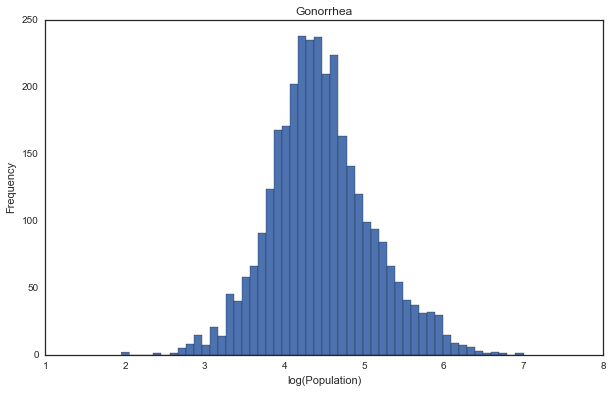

In [734]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Population'])
ax = data.plot.hist(50)
ax.set_xlabel("log(Population)")
ax.set_title("Gonorrhea")
plt.savefig('../graphics/county_population_gonorrhea.png', bbox_inches='tight', dpi=150)

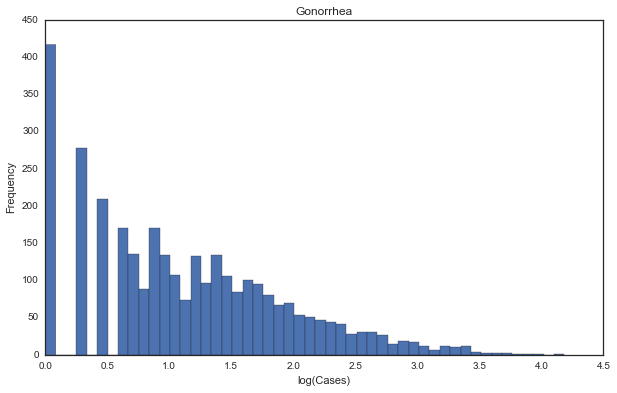

In [735]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Cases']+1)
ax = data.plot.hist(50)
ax.set_xlabel("log(Cases)")
ax.set_title("Gonorrhea")
plt.savefig('../graphics/county_cases_gonorrhea.png', bbox_inches='tight', dpi=150)

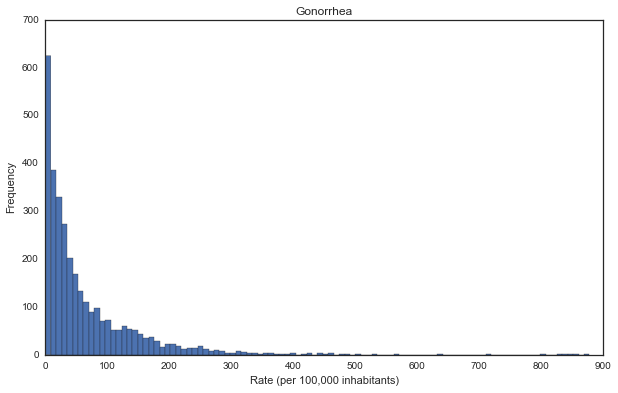

In [736]:
fig = plt.figure(figsize=(10, 6))
ax = df['Rate'].plot.hist(100)
ax.set_xlabel("Rate (per 100,000 inhabitants)")
ax.set_title("Gonorrhea")
plt.savefig('../graphics/county_rate_gonorrhea.png', bbox_inches='tight', dpi=150)

In [737]:
outliers = df[df['Rate']<10]

In [738]:
outliers

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
66,Gonorrhea,Winston County,AL,1133,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,24146,2,8.3
72,Gonorrhea,Denali Borough,AK,2068,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1867,0,0.0
75,Gonorrhea,Haines Borough,AK,2100,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2592,0,0.0
88,Gonorrhea,Prince of Wales - Outer Ketchikan,AK,2201,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,5786,0,0.0
93,Gonorrhea,Valdez-Cordova Census Area,AK,2261,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,9763,0,0.0
96,Gonorrhea,Wrangell-Petersburg Census Area,AK,2280,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,6174,0,0.0
97,Gonorrhea,Yakutat City and Borough,AK,2282,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,642,0,0.0
125,Gonorrhea,Cleburne County,AR,5023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25686,1,3.9
138,Gonorrhea,Fulton County,AR,5049,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,12304,0,0.0
157,Gonorrhea,Madison County,AR,5087,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,15701,0,0.0


In [739]:
not_exclude_list = df["Cases"]<0
exclude_list = [not i for i in not_exclude_list]
df_sig = df[exclude_list].copy()

In [740]:
df = df_sig.copy()

In [741]:
df["Rate"].sort_values()

880       0.0
1654      0.0
1655      0.0
3083      0.0
1234      0.0
3089      0.0
3090      0.0
1658      0.0
660       0.0
1659      0.0
1660      0.0
2807      0.0
1651      0.0
1661      0.0
2423      0.0
1665      0.0
310       0.0
1190      0.0
308       0.0
305       0.0
675       0.0
303       0.0
302       0.0
1671      0.0
1676      0.0
1664      0.0
1650      0.0
1649      0.0
1235      0.0
620       0.0
        ...  
1152    451.9
148     456.3
1149    458.3
73      459.1
2713    462.8
2948    478.7
81      485.4
1600    486.2
2375    508.6
1983    528.9
159     529.9
1995    567.1
2944    633.1
2384    716.1
2424    801.4
2379    830.4
2420    835.8
1643    844.9
2032    850.4
2035    857.8
94      877.5
76        NaN
83        NaN
86        NaN
87        NaN
90        NaN
95        NaN
2919      NaN
3146      NaN
3148      NaN
Name: Rate, dtype: float64

In [742]:
len(df['Area'].unique())

1962

In [743]:
df.shape

(3228, 12)

In [744]:
df.sort_values(by='Area')

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
2319,Gonorrhea,Abbeville County,SC,45001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25007,43,172.0
1116,Gonorrhea,Acadia Parish,LA,22001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,62204,106,170.4
2823,Gonorrhea,Accomack County,VA,51001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,33148,28,84.5
554,Gonorrhea,Ada County,ID,16001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,416464,205,49.2
996,Gonorrhea,Adair County,KY,21001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,18732,6,32.0
1486,Gonorrhea,Adair County,MO,29001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25572,8,31.3
792,Gonorrhea,Adair County,IA,19001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,7472,2,26.8
2134,Gonorrhea,Adair County,OK,40001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22194,11,49.6
1657,Gonorrhea,Adams County,NE,31001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,31610,8,25.3
700,Gonorrhea,Adams County,IN,18001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34614,6,17.3


In [745]:
df['Area'].value_counts()

Washington County       30
Jefferson County        25
Franklin County         24
Jackson County          23
Lincoln County          23
Madison County          19
Montgomery County       18
Clay County             18
Union County            17
Monroe County           17
Marion County           17
Wayne County            16
Grant County            14
Warren County           14
Greene County           14
Carroll County          13
Marshall County         12
Douglas County          12
Johnson County          12
Clark County            12
Polk County             12
Lee County              12
Adams County            12
Lake County             12
Lawrence County         11
Fayette County          11
Crawford County         11
Morgan County           11
Scott County            11
Calhoun County          11
                        ..
Mayes County             1
Washtenaw County         1
Henrico County           1
Parmer County            1
Attala County            1
Lackawanna County        1
G

In [746]:
df.isnull().values.any()

True

In [747]:
null_list = df["Population"].isnull()
not_null_list = [not i for i in null_list]
df_clean = df[not_null_list].copy()

In [748]:
null_list = df_clean["Rate"].isnull()
not_null_list = [not i for i in null_list]
df_completely_clean = df_clean[not_null_list].copy()

In [749]:
df_completely_clean["Rate"].isnull().values.any()

False

## Model the Gonorrhea rate

In [750]:
df_merged = pd.read_csv("../data/chlamydia_cdc_census.csv")

In [751]:
df_completely_clean[df_completely_clean["FIPS"]==1001].Cases[0]

48.0

Replace the number of Chlamydia cases with the number of Gonorrhea cases

In [752]:
#print(df_merged[df_merged["FIPS"]==1001].Cases[0])
#df_merged.set_value(1, "FIPS", 10)
for county in df_merged["FIPS"]:
    rowlist = df_merged[df_merged['FIPS'] == county].index.tolist()
    gonorrhea_cases = df_completely_clean[df_completely_clean["FIPS"] == county].Cases.tolist()
    df_merged.set_value(rowlist[0], 'Cases', gonorrhea_cases[0])
#    print(df_merged["FIPS"][rowlist[0]])
    #df_merged[df_merged["FIPS"]==county]

In [753]:
df_merged.head()

,FIPS,Population,Cases,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
0,1001,55246,48,4.736962,21.8,7.9,5.6,5.8,6.1,7.6,7.5,15.0,10.7,12.0,37.0,48.7,51.3,78.5,17.7,0.4,0.9,0.1,1.6,2.4,99.2,37.1,20.8,31.8,23.6,6.1,0.8,74.5,34.9,56.2,25.3,25.5,2.68,3.13,75.4,24.6,52475,0.562138,0.003017,0.020029,0.002868,0.017704,92.781808
1,1003,195540,153,5.260703,19.0,6.4,5.2,5.6,5.9,6.3,6.6,14.8,13.5,16.9,41.1,48.9,51.1,85.7,9.4,0.7,0.7,0.0,1.5,4.4,98.7,40.2,21.9,26.8,20.1,5.6,1.3,69.9,28.0,54.5,19.9,30.1,2.46,2.93,72.5,27.5,50183,0.545409,0.002747,0.023886,0.003444,0.020292,122.920831
2,1005,27076,52,4.438653,18.0,6.3,6.5,7.3,6.6,6.6,6.6,14.7,13.2,14.3,39.0,53.1,46.9,48.0,46.9,0.4,0.4,0.1,0.9,5.1,88.4,35.8,15.6,25.7,17.7,7.8,11.6,68.4,27.4,43.7,14.4,31.6,2.47,3.01,66.8,33.2,35634,0.437169,0.002342,0.019348,0.003666,0.022200,30.563959
3,1007,22512,22,4.360120,18.4,6.7,6.5,7.0,7.2,7.6,7.1,14.8,11.9,12.6,37.8,53.7,46.3,75.8,22.0,0.3,0.1,0.1,0.9,1.8,90.3,34.7,18.2,26.8,18.7,7.5,9.7,72.3,29.5,52.5,20.1,27.7,2.60,3.09,75.6,24.4,37984,0.524582,0.001886,0.020244,0.002012,0.020370,36.101222
4,1009,57872,6,4.758321,20.2,7.0,5.4,6.0,6.0,6.8,7.0,14.1,12.6,14.6,39.0,49.5,50.5,92.6,1.3,0.5,0.2,0.1,1.2,8.1,99.1,37.6,22.8,29.2,21.3,6.4,0.9,75.0,31.1,60.6,24.1,25.0,2.63,3.07,80.6,19.4,44409,0.606034,0.001946,0.017981,0.003707,0.013440,89.615659


In [754]:
df_merged.describe()

,FIPS,Population,Cases,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
count,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,30492.802614,100423.684967,103.278758,4.460522,19.163007,6.908072,5.977222,5.819314,5.695294,5.899739,6.297484,15.002190,13.250327,15.985556,40.491667,50.003856,49.996144,84.076340,8.121307,1.550719,1.165033,0.082418,1.966765,8.417353,96.604379,39.254118,20.403791,27.047647,20.409281,5.134248,3.395654,67.828627,27.814542,52.057712,19.173268,32.171438,2.476042,2.988451,72.576307,27.423791,46800.265359,0.520577,0.002492,0.030613,0.003221,0.024522,239.640924
std,15071.256920,323873.098080,492.184847,0.634640,2.846254,1.135197,2.546279,1.223101,0.950620,0.878120,0.830619,1.506377,2.129781,4.166765,4.959052,2.204346,2.204346,15.045667,13.038226,5.071524,2.533382,0.967483,1.549707,13.303866,4.451890,3.484761,2.711350,3.484574,3.001770,2.163983,4.451875,4.990887,4.766401,5.948292,4.289568,4.990872,0.203247,0.181387,7.350396,7.350283,12025.134705,0.059487,0.001291,0.007625,0.001295,0.007228,1610.657866
min,1001.000000,90.000000,0.000000,1.913814,0.000000,0.000000,1.300000,2.300000,2.400000,1.200000,2.800000,6.300000,4.000000,3.500000,22.600000,43.200000,27.900000,14.200000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,45.000000,17.600000,7.500000,4.400000,0.000000,0.700000,0.000000,18.800000,0.000000,11.600000,0.000000,13.400000,1.260000,2.000000,1.400000,10.200000,19146.000000,0.115942,0.000000,0.000000,0.000000,0.000000,0.069674
25%,19006.500000,11208.000000,2.000000,4.051722,17.400000,6.300000,4.700000,5.100000,5.100000,5.400000,5.800000,14.200000,12.000000,13.300000,37.700000,48.900000,49.600000,76.575000,0.500000,0.200000,0.300000,0.000000,1.100000,1.600000,96.300000,37.400000,18.800000,25.000000,18.600000,3.500000,1.100000,65.200000,25.000000,48.800000,16.500000,29.300000,2.350000,2.880000,69.200000,22.600000,38810.000000,0.488003,0.001797,0.025435,0.002469,0.020005,17.078483
50%,29188.000000,25987.000000,10.000000,4.414815,19.100000,6.800000,5.500000,5.600000,5.600000,5.900000,6.300000,15.100000,13.100000,15.700000,40.500000,49.500000,50.500000,89.450000,1.900000,0.400000,0.500000,0.000000,1.600000,3.300000,98.200000,39.500000,20.700000,27.100000,20.400000,4.900000,1.800000,68.100000,27.450000,52.500000,18.700000,31.900000,2.450000,2.970000,73.800000,26.200000,45009.500000,0.524803,0.002367,0.030222,0.003160,0.024365,45.094109
75%,45085.500000,67582.250000,43.000000,4.825413,20.700000,7.300000,6.500000,6.400000,6.200000,6.400000,6.800000,15.800000,14.300000,18.300000,43.400000,50.400000,51.100000,95.625000,9.400000,0.800000,1.000000,0.100000,2.300000,8.400000,98.900000,41.300000,22.225000,29.000000,22.000000,6.500000,3.700000,70.700000,30.100000,55.700000,21.000000,34.800000,2.570000,3.070000,77.400000,30.800000,52013.500000,0.556712,0.002993,0.035313,0.003841,0.028793,114.277352
max,56045.000000,10017068.000000,15316.000000,6.992050,33.600000,18.300000,28.100000,16.100000,11.700000,9.700000,11.900000,24.500000,28.100000,43.400000,62.700000,72.100000,56.800000,99.200000,84.400000,75.500000,43.900000,48.900000,29.500000,95.700000,100.000000,76.700000,28.800000,42.

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


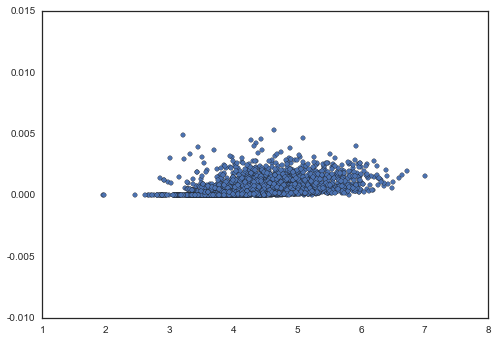

In [755]:
plt.scatter(np.log10(df_merged["Population"]), df_merged["Cases"]/df_merged["Population"])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


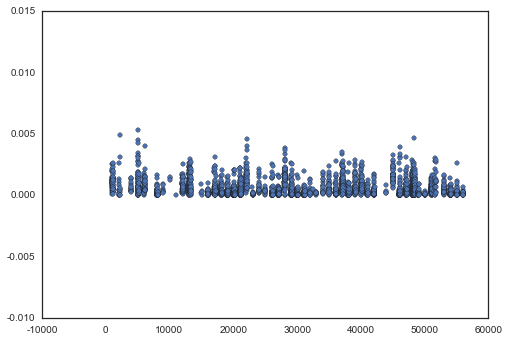

In [756]:
plt.scatter(df_merged["FIPS"], df_merged["Cases"]/df_merged["Population"])

### Plot the correlation matrix

In [757]:
df_all = df_merged.copy()
df_all["Rate"] = df_all["Cases"]/df_all["Population"]
corr = df_all.corr()

In [758]:
pearsonr = corr["Rate"]
pearsonr

FIPS         -0.074673
Population    0.200290
Cases         0.299517
hd01s001      0.326293
hd02s002      0.177230
hd02s005      0.180993
hd02s006      0.261563
hd02s007      0.389383
hd02s008      0.305542
hd02s009      0.185169
hd02s010      0.048447
hd02s011     -0.264997
hd02s013     -0.303107
hd02s015     -0.312399
hd01s020     -0.366802
hd02s026     -0.156963
hd02s051      0.156963
hd02s078     -0.677478
hd02s079      0.638579
hd02s080      0.142858
hd02s081      0.137539
hd02s089     -0.004756
hd02s095      0.167221
hd02s107      0.086671
hd02s131     -0.083829
hd02s132     -0.214553
hd02s133     -0.583597
hd02s134      0.172910
hd02s135     -0.016189
hd02s136      0.539012
hd02s143      0.083823
hd02s151     -0.037727
hd02s152      0.143635
hd02s153     -0.523363
hd02s154     -0.166232
hd02s159      0.037720
hd01s167      0.179159
hd01s168      0.279396
hd02s181     -0.419810
hd02s184      0.419816
hd01vd01     -0.149611
d002         -0.523460
d014          0.176792
d019       

In [759]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


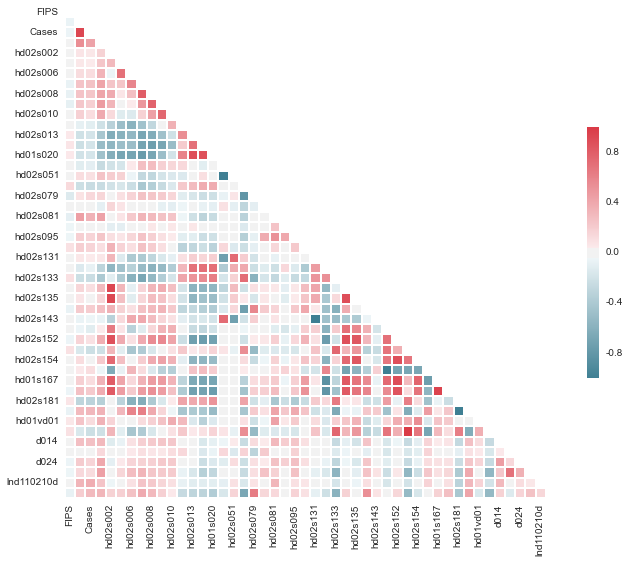

In [760]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.savefig('../graphics/cross-correlation_gonorrhea.png', bbox_inches='tight', dpi=150)

### Make principal component analysis

In [761]:
from sklearn.decomposition import PCA

In [762]:
df_merged.describe()

,FIPS,Population,Cases,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
count,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,30492.802614,100423.684967,103.278758,4.460522,19.163007,6.908072,5.977222,5.819314,5.695294,5.899739,6.297484,15.002190,13.250327,15.985556,40.491667,50.003856,49.996144,84.076340,8.121307,1.550719,1.165033,0.082418,1.966765,8.417353,96.604379,39.254118,20.403791,27.047647,20.409281,5.134248,3.395654,67.828627,27.814542,52.057712,19.173268,32.171438,2.476042,2.988451,72.576307,27.423791,46800.265359,0.520577,0.002492,0.030613,0.003221,0.024522,239.640924
std,15071.256920,323873.098080,492.184847,0.634640,2.846254,1.135197,2.546279,1.223101,0.950620,0.878120,0.830619,1.506377,2.129781,4.166765,4.959052,2.204346,2.204346,15.045667,13.038226,5.071524,2.533382,0.967483,1.549707,13.303866,4.451890,3.484761,2.711350,3.484574,3.001770,2.163983,4.451875,4.990887,4.766401,5.948292,4.289568,4.990872,0.203247,0.181387,7.350396,7.350283,12025.134705,0.059487,0.001291,0.007625,0.001295,0.007228,1610.657866
min,1001.000000,90.000000,0.000000,1.913814,0.000000,0.000000,1.300000,2.300000,2.400000,1.200000,2.800000,6.300000,4.000000,3.500000,22.600000,43.200000,27.900000,14.200000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,45.000000,17.600000,7.500000,4.400000,0.000000,0.700000,0.000000,18.800000,0.000000,11.600000,0.000000,13.400000,1.260000,2.000000,1.400000,10.200000,19146.000000,0.115942,0.000000,0.000000,0.000000,0.000000,0.069674
25%,19006.500000,11208.000000,2.000000,4.051722,17.400000,6.300000,4.700000,5.100000,5.100000,5.400000,5.800000,14.200000,12.000000,13.300000,37.700000,48.900000,49.600000,76.575000,0.500000,0.200000,0.300000,0.000000,1.100000,1.600000,96.300000,37.400000,18.800000,25.000000,18.600000,3.500000,1.100000,65.200000,25.000000,48.800000,16.500000,29.300000,2.350000,2.880000,69.200000,22.600000,38810.000000,0.488003,0.001797,0.025435,0.002469,0.020005,17.078483
50%,29188.000000,25987.000000,10.000000,4.414815,19.100000,6.800000,5.500000,5.600000,5.600000,5.900000,6.300000,15.100000,13.100000,15.700000,40.500000,49.500000,50.500000,89.450000,1.900000,0.400000,0.500000,0.000000,1.600000,3.300000,98.200000,39.500000,20.700000,27.100000,20.400000,4.900000,1.800000,68.100000,27.450000,52.500000,18.700000,31.900000,2.450000,2.970000,73.800000,26.200000,45009.500000,0.524803,0.002367,0.030222,0.003160,0.024365,45.094109
75%,45085.500000,67582.250000,43.000000,4.825413,20.700000,7.300000,6.500000,6.400000,6.200000,6.400000,6.800000,15.800000,14.300000,18.300000,43.400000,50.400000,51.100000,95.625000,9.400000,0.800000,1.000000,0.100000,2.300000,8.400000,98.900000,41.300000,22.225000,29.000000,22.000000,6.500000,3.700000,70.700000,30.100000,55.700000,21.000000,34.800000,2.570000,3.070000,77.400000,30.800000,52013.500000,0.556712,0.002993,0.035313,0.003841,0.028793,114.277352
max,56045.000000,10017068.000000,15316.000000,6.992050,33.600000,18.300000,28.100000,16.100000,11.700000,9.700000,11.900000,24.500000,28.100000,43.400000,62.700000,72.100000,56.800000,99.200000,84.400000,75.500000,43.900000,48.900000,29.500000,95.700000,100.000000,76.700000,28.800000,42.

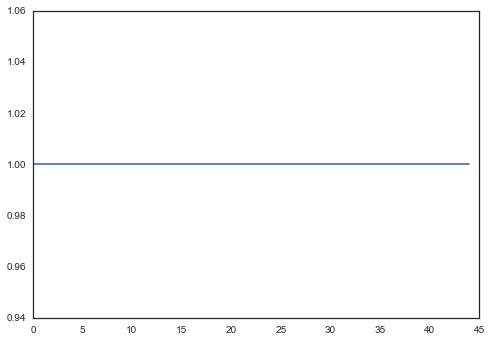

In [763]:
df_new = df_merged.drop(["FIPS","Cases"], axis=1)
X = df_new.values

columns = X.shape[1]
for column in np.arange(columns):
    mean_temp = X[:,column].mean()
    std_temp = X[:,column].std()
    X[:,column] = (X[:,column]-mean_temp)/std_temp

plt.plot((np.std(X, axis=0)))

In [764]:
X.shape

(3060, 45)

In [765]:
pca = PCA(n_components=44)
pca.fit(X)
pca.explained_variance_ratio_

array([  2.69921884e-01,   1.90278664e-01,   9.30640065e-02,
         7.23782712e-02,   6.24436753e-02,   4.43868669e-02,
         4.16750844e-02,   2.91740925e-02,   2.70615975e-02,
         2.38013945e-02,   1.88585307e-02,   1.56524336e-02,
         1.48047143e-02,   1.23828589e-02,   1.14220041e-02,
         1.08218100e-02,   8.82899796e-03,   8.64470165e-03,
         7.58203540e-03,   6.80307559e-03,   5.01282172e-03,
         4.46509181e-03,   3.82090648e-03,   3.18207349e-03,
         2.96301074e-03,   2.57147980e-03,   1.96469833e-03,
         1.58935929e-03,   1.41475569e-03,   1.06042952e-03,
         8.57599305e-04,   2.85849664e-04,   2.19045573e-04,
         1.62230637e-04,   1.61542561e-04,   1.38356709e-04,
         7.17766666e-05,   5.10631308e-05,   1.33234967e-05,
         7.61768564e-06,   2.61942672e-07,   2.88391824e-09,
         1.99653563e-09,   1.82103246e-09])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


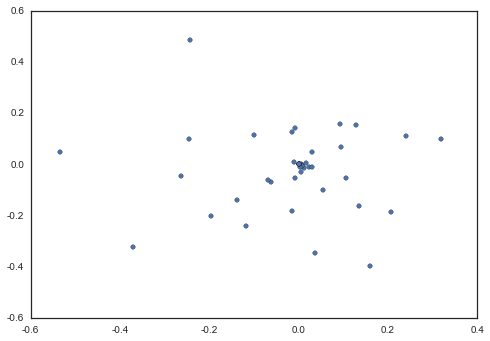

In [766]:
plt.scatter(pca.components_[:,0], pca.components_[:,1])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


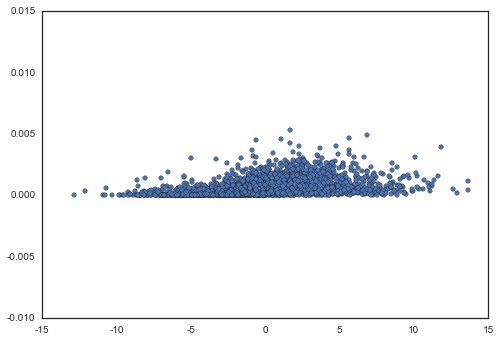

In [767]:
X_trans = pca.transform(X)
Y = df_merged["Cases"]/df_merged["Population"]
plt.scatter(X_trans[:,0],Y)

### Linear regression

In [768]:
from sklearn import linear_model

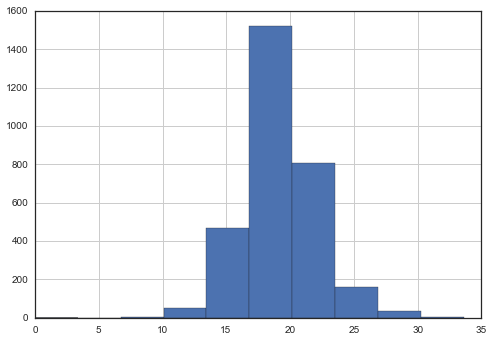

In [769]:
df_new["hd02s002"].hist()

In [770]:
df_new.head()

,Population,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
0,55246,4.736962,21.8,7.9,5.6,5.8,6.1,7.6,7.5,15.0,10.7,12.0,37.0,48.7,51.3,78.5,17.7,0.4,0.9,0.1,1.6,2.4,99.2,37.1,20.8,31.8,23.6,6.1,0.8,74.5,34.9,56.2,25.3,25.5,2.68,3.13,75.4,24.6,52475,0.562138,0.003017,0.020029,0.002868,0.017704,92.781808
1,195540,5.260703,19.0,6.4,5.2,5.6,5.9,6.3,6.6,14.8,13.5,16.9,41.1,48.9,51.1,85.7,9.4,0.7,0.7,0.0,1.5,4.4,98.7,40.2,21.9,26.8,20.1,5.6,1.3,69.9,28.0,54.5,19.9,30.1,2.46,2.93,72.5,27.5,50183,0.545409,0.002747,0.023886,0.003444,0.020292,122.920831
2,27076,4.438653,18.0,6.3,6.5,7.3,6.6,6.6,6.6,14.7,13.2,14.3,39.0,53.1,46.9,48.0,46.9,0.4,0.4,0.1,0.9,5.1,88.4,35.8,15.6,25.7,17.7,7.8,11.6,68.4,27.4,43.7,14.4,31.6,2.47,3.01,66.8,33.2,35634,0.437169,0.002342,0.019348,0.003666,0.022200,30.563959
3,22512,4.360120,18.4,6.7,6.5,7.0,7.2,7.6,7.1,14.8,11.9,12.6,37.8,53.7,46.3,75.8,22.0,0.3,0.1,0.1,0.9,1.8,90.3,34.7,18.2,26.8,18.7,7.5,9.7,72.3,29.5,52.5,20.1,27.7,2.60,3.09,75.6,24.4,37984,0.524582,0.001886,0.020244,0.002012,0.020370,36.101222
4,57872,4.758321,20.2,7.0,5.4,6.0,6.0,6.8,7.0,14.1,12.6,14.6,39.0,49.5,50.5,92.6,1.3,0.5,0.2,0.1,1.2,8.1,99.1,37.6,22.8,29.2,21.3,6.4,0.9,75.0,31.1,60.6,24.1,25.0,2.63,3.07,80.6,19.4,44409,0.606034,0.001946,0.017981,0.003707,0.013440,89.615659


In [771]:
df_merged.head()

,FIPS,Population,Cases,hd01s001,hd02s002,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s013,hd02s015,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184,hd01vd01,d002,d014,d019,d024,d029,lnd110210d
0,1001,55246,48,4.736962,21.8,7.9,5.6,5.8,6.1,7.6,7.5,15.0,10.7,12.0,37.0,48.7,51.3,78.5,17.7,0.4,0.9,0.1,1.6,2.4,99.2,37.1,20.8,31.8,23.6,6.1,0.8,74.5,34.9,56.2,25.3,25.5,2.68,3.13,75.4,24.6,52475,0.562138,0.003017,0.020029,0.002868,0.017704,92.781808
1,1003,195540,153,5.260703,19.0,6.4,5.2,5.6,5.9,6.3,6.6,14.8,13.5,16.9,41.1,48.9,51.1,85.7,9.4,0.7,0.7,0.0,1.5,4.4,98.7,40.2,21.9,26.8,20.1,5.6,1.3,69.9,28.0,54.5,19.9,30.1,2.46,2.93,72.5,27.5,50183,0.545409,0.002747,0.023886,0.003444,0.020292,122.920831
2,1005,27076,52,4.438653,18.0,6.3,6.5,7.3,6.6,6.6,6.6,14.7,13.2,14.3,39.0,53.1,46.9,48.0,46.9,0.4,0.4,0.1,0.9,5.1,88.4,35.8,15.6,25.7,17.7,7.8,11.6,68.4,27.4,43.7,14.4,31.6,2.47,3.01,66.8,33.2,35634,0.437169,0.002342,0.019348,0.003666,0.022200,30.563959
3,1007,22512,22,4.360120,18.4,6.7,6.5,7.0,7.2,7.6,7.1,14.8,11.9,12.6,37.8,53.7,46.3,75.8,22.0,0.3,0.1,0.1,0.9,1.8,90.3,34.7,18.2,26.8,18.7,7.5,9.7,72.3,29.5,52.5,20.1,27.7,2.60,3.09,75.6,24.4,37984,0.524582,0.001886,0.020244,0.002012,0.020370,36.101222
4,1009,57872,6,4.758321,20.2,7.0,5.4,6.0,6.0,6.8,7.0,14.1,12.6,14.6,39.0,49.5,50.5,92.6,1.3,0.5,0.2,0.1,1.2,8.1,99.1,37.6,22.8,29.2,21.3,6.4,0.9,75.0,31.1,60.6,24.1,25.0,2.63,3.07,80.6,19.4,44409,0.606034,0.001946,0.017981,0.003707,0.013440,89.615659


Split data set into training/test and validation data

In [772]:
cutoff = 1

X = df_new[df_merged["Cases"]>cutoff].values
Y = df_merged[df_merged["Cases"]>cutoff].Cases/(df_merged[df_merged["Cases"]>cutoff].Population+1.0)

X_full = df_new.values
Y_full = df_merged.Cases/(df_merged.Population+1.0)

#normalize all columns to the same normalization
columns = X.shape[1]
means = np.zeros(columns)
stds = np.zeros(columns)
for column in np.arange(columns):
    mean_temp = X[:,column].mean()
    std_temp = X[:,column].std()
    means[column] = mean_temp
    stds[column] = std_temp
    X[:,column] = (X[:,column]-mean_temp)/std_temp
    X_full[:,column] = (X_full[:,column]-mean_temp)/std_temp

Ymean = Y_full.mean()
Ystd = Y_full.std()

Y = (Y-Ymean)/Ystd
Y_full = (Y_full-Ymean)/Ystd
    
ones = np.ones(round(0.75*len(X)), dtype=bool)
zeros = np.zeros(len(X)-round(0.75*len(X)), dtype=bool)
training_list = np.hstack((ones, zeros))
np.random.shuffle(training_list)
test_list = np.zeros(len(X),dtype=bool)
test_list = np.array([not i for i in training_list])

X_train = X[training_list]
X_test = X[test_list]
Y_train = Y[training_list]
Y_test = Y[test_list]

X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape

((2400, 45), (1800, 45), (600, 45), (2400,), (1800,), (600,))

In [773]:
X.shape, Y.shape

((2400, 45), (2400,))

In [774]:
Y_test.describe()

count    600.000000
mean       0.219704
std        0.996569
min       -0.880305
25%       -0.508192
50%       -0.140885
75%        0.635945
max        6.010963
dtype: float64

In [775]:
#X_weights = df_merged.values
#X_train_weights = X_weights[training_list]
weights = 1 #X_train_weights[:,2]
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train, sample_weight=weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [776]:
print(regr.coef_)

[  4.27813573e-02   1.21018101e-01  -1.77676257e-01  -1.96219766e-01
  -4.25092824e-01  -2.69643538e-01  -1.01732740e-01  -1.35572239e-01
  -2.17601692e-01  -8.02529046e-02  -4.75446859e-01  -6.04320712e-01
  -3.16574958e-01   2.75623437e+11   2.75623437e+11   2.71012581e-02
   3.77999886e-01   1.31011856e-01   1.99070847e-02  -3.69626232e-02
   6.31124902e-02   4.33797484e-02   5.18717750e+12   1.08440885e+00
  -7.86362021e-01  -7.59857652e-01   2.19161217e-01  -2.07515435e-01
   5.18717750e+12  -1.67523175e+01   2.44224695e-01  -1.10452661e+00
  -7.62808656e-01  -1.79008523e+01  -5.52552287e-01   8.54232356e-01
   2.20144117e+01   2.21899239e+01   1.49053741e-01   1.37570137e+00
   2.49358267e-02  -5.15632569e-02  -2.64678058e-02  -6.08405484e-02
  -1.13497907e-02]


In [777]:
1.0-np.sum((regr.predict(X_test)-Y_test)**2)/np.sum((Y_test-np.mean(Y_test))**2)

0.55152884038595196

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


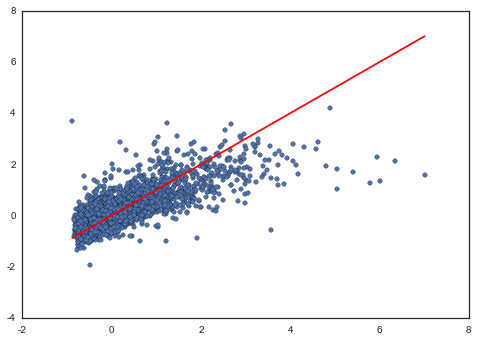

In [778]:
plt.scatter(Y,regr.predict(X))
plt.plot(np.linspace(Y.min(),Y.max(),num=10),np.linspace(Y.min(),Y.max(),num=10),color='red')

In [779]:
print('Variance score: %.5f\t(%.5f)' % (regr.score(X_test, Y_test), regr.score(X_full, Y_full)))

Variance score: 0.55153	(-4545269269858532864.00000)


In [780]:
from sklearn import cross_validation
cv = cross_validation.ShuffleSplit(len(Y_train), n_iter=5, test_size=0.2, random_state=0)
scores_regression = cross_validation.cross_val_score(regr, X_train, Y_train, cv=cv)
scores_regression
#cross_val_score(regr, X_train, Y_train, cv=6, n_jobs=1)
#scores

array([ 0.57091755,  0.56029508,  0.61455472,  0.57060662,  0.60717865])

In [781]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_regression.mean(), scores_regression.std() * 2))

Accuracy: 0.58 (+/- 0.04)


In [782]:
from sklearn.metrics import explained_variance_score

In [783]:
explained_variance_score(Y_train, regr.predict(X_train))

0.61626801533740627

In [784]:
from sklearn.metrics import mean_absolute_error

In [785]:
mean_absolute_error(Y_train, regr.predict(X_train))

0.43773351683545009

In [786]:
from sklearn.metrics import mean_squared_error

In [787]:
mean_squared_error(Y_train, regr.predict(X_train))

0.40612985898680437

In [788]:
from sklearn.metrics import median_absolute_error

In [789]:
median_absolute_error(Y_train, regr.predict(X_train))

0.31052999860306751

In [790]:
from sklearn.metrics import r2_score

In [791]:
r2_score(Y_train, regr.predict(X_train))

0.61626800420426497

## Polynomial regression

In [792]:
from sklearn.preprocessing import PolynomialFeatures

In [793]:
poly = PolynomialFeatures(degree=2)

In [794]:
X_train_poly = poly.fit_transform(X_train)

In [795]:
poly_regr = linear_model.LinearRegression(fit_intercept=False)
poly_regr.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


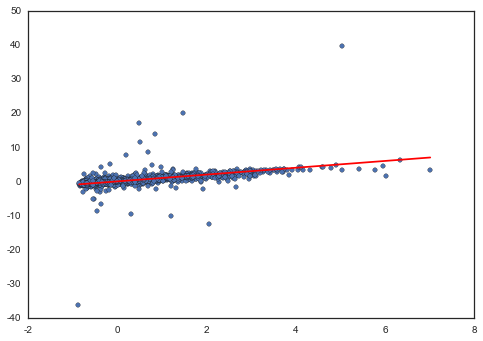

In [796]:
plt.scatter(Y,poly_regr.predict(poly.fit_transform(X)))
plt.plot(np.linspace(Y_train.min(),Y_train.max(),num=10),np.linspace(Y_train.min(),Y_train.max(),num=10),color='red')

In [797]:
print('Variance score: %.5f\t(%.5f)' % (poly_regr.score(poly.fit_transform(X_test), Y_test), poly_regr.score(poly.fit_transform(X), Y)))

Variance score: -6.77591	(-0.94779)


## Ridge regression

In [798]:
from sklearn import linear_model

In [799]:
rregr = linear_model.Ridge(alpha=0.5)
rregr.fit(X_train, Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [800]:
print('Variance score: %.5f\t(%.5f)' % (rregr.score(X_test, Y_test), rregr.score(X_full, Y_full)))

Variance score: 0.55318	(0.60603)


In [801]:
scores_rregression = cross_validation.cross_val_score(rregr, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rregression.mean(), scores_rregression.std() * 2))

Accuracy: 0.59 (+/- 0.04)


## Extra Trees Regression

In [802]:
from sklearn.ensemble import ExtraTreesRegressor

In [803]:
clf = ExtraTreesRegressor(n_estimators=250, bootstrap=True, oob_score=True, max_features='sqrt')
clf.fit(X_train, Y_train)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=250, n_jobs=1, oob_score=True, random_state=None,
          verbose=0, warm_start=False)

In [804]:
print('Variance score: %.5f\t(%.5f)\nOut of bag error score: %.5f' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full),clf.oob_score_))

Variance score: 0.63554	(0.79009)
Out of bag error score: 0.62124


In [805]:
scores_etregression = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_etregression.mean(), scores_etregression.std() * 2))

Accuracy: 0.63 (+/- 0.05)


## Ada Boost Regressor

In [806]:
from sklearn.ensemble import AdaBoostRegressor

In [807]:
clf = AdaBoostRegressor(n_estimators=500, learning_rate=0.01, loss='linear')
clf.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=500, random_state=None)

In [808]:
print('Variance score: %.5f\t(%.5f)' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full)))

Variance score: 0.56459	(0.53555)


In [809]:
scores_adaregression = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_adaregression.mean(), scores_adaregression.std() * 2))

Accuracy: 0.55 (+/- 0.06)


## Bagging regressor

In [810]:
from sklearn.ensemble import BaggingRegressor

In [811]:
clf = BaggingRegressor(n_estimators=250, bootstrap=True, oob_score=True, max_features=20)
clf.fit(X_train, Y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=20, max_samples=1.0,
         n_estimators=250, n_jobs=1, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [812]:
print('Variance score: %.5f\t(%.5f)\nOut of bag error score: %.5f' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full),clf.oob_score_))

Variance score: 0.64367	(0.69963)
Out of bag error score: 0.64187


In [813]:
scores_bagregression = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_bagregression.mean(), scores_bagregression.std() * 2))

Accuracy: 0.64 (+/- 0.04)


## Gradient Boosting Regressor

In [814]:
from sklearn.ensemble import GradientBoostingRegressor

In [815]:
clf = GradientBoostingRegressor(n_estimators=250, max_features=10,max_depth=5)
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=5, max_features=10, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [816]:
print('Variance score: %.5f\t(%.5f)' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full)))

Variance score: 0.63946	(0.69834)


/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


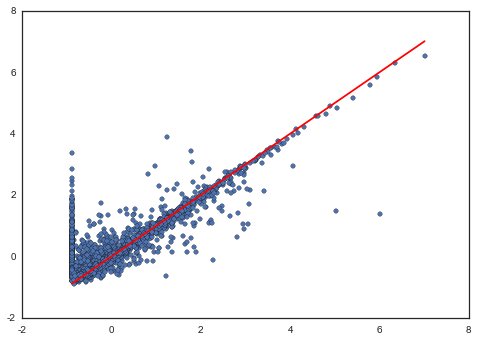

In [817]:
plt.scatter(Y_full,clf.predict(X_full))
plt.plot(np.linspace(Y_full.min(),Y_full.max(),num=10),np.linspace(Y_full.min(),Y_full.max(),num=10),color='red')

In [818]:
scores_gradboostregression = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gradboostregression.mean(), scores_gradboostregression.std() * 2))

Accuracy: 0.63 (+/- 0.04)


In [819]:
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=5, max_features=10, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [820]:
import pickle

In [821]:
with open("../data/gradientboosting_params_gonorrhea.pickle", "wb") as myfile:
    pickle.dump(clf, myfile)

## Random forest

In [822]:
from sklearn.ensemble import RandomForestRegressor

In [823]:
clf = RandomForestRegressor(n_estimators=250, oob_score=True, max_features='sqrt')
clf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=250, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [824]:
print('Variance score: %.5f\t(%.5f)\nOut of bag error score: %.5f' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full),clf.oob_score_))

Variance score: 0.64246	(0.72292)
Out of bag error score: 0.63631


In [825]:
scores_randomforest = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_randomforest.mean(), scores_randomforest.std() * 2))

Accuracy: 0.64 (+/- 0.05)


In [826]:
clf = RandomForestRegressor(n_estimators=250, oob_score=True, max_features='sqrt')
clf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=250, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


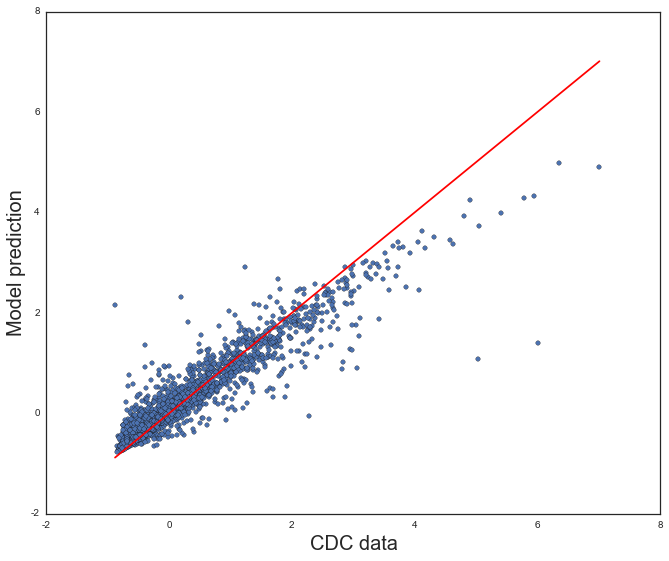

In [827]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#ax.text(-1.5, 3, r'$R^2 = $%.2f'%(clf.oob_score_), fontsize=30)


ax.set_xlabel("CDC data", fontsize=20)
ax.set_ylabel("Model prediction", fontsize=20)

ax = plt.scatter(Y,clf.predict(X))
ax2 = plt.plot(np.linspace(Y.min(),Y.max(),10),np.linspace(Y.min(),Y.max(),10),color='red')

plt.savefig('../graphics/data_vs_model_gonorrhea.png', bbox_inches='tight', dpi=150)

/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akuepper/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


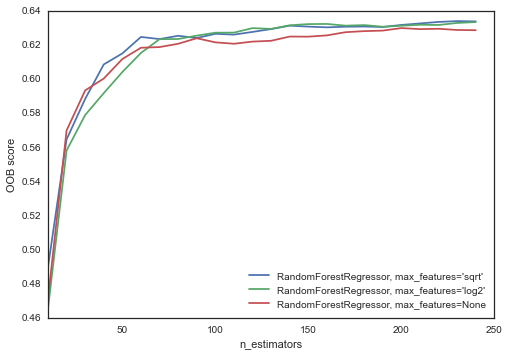

In [828]:
from collections import OrderedDict
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(warm_start=False, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(warm_start=False, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(warm_start=False, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 250

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators,10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, Y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB score")
plt.legend(loc="lower right")

plt.savefig('../graphics/features_estimators_gonorrhea.png', bbox_inches='tight', dpi=150)

In [829]:
feature_importance = (np.vstack((np.arange(len(clf.feature_importances_)), clf.feature_importances_)).T)
ranking = feature_importance[feature_importance[:,1].argsort()[::-1]]

In [830]:
for rank, importance in ranking: 
    print(df_new.columns[rank], importance)

hd02s078 0.337952052002
hd02s079 0.111083829347
d002 0.0890999146108
hd02s153 0.0346583946157
hd02s002 0.0266101489401
d024 0.0215467861437
hd02s184 0.02109198278
lnd110210d 0.0171088247409
d014 0.017072612666
hd02s181 0.0162935504255
hd01s001 0.016290498604
hd02s107 0.0150010751944
Population 0.0146299173962
hd01vd01 0.0138457076518
d019 0.0121039424342
d029 0.0112400270106
hd02s136 0.0111892558697
hd02s080 0.0111831282572
hd02s011 0.0104033736229
hd02s132 0.0100549763765
hd02s010 0.00999201742098
hd02s026 0.00978586511575
hd02s135 0.00960434701555
hd02s133 0.00959994301991
hd02s134 0.0092989705131
hd02s051 0.00916899643626
hd02s005 0.00907006720495
hd02s154 0.00874334609239
hd01s168 0.00847463376132
hd01s020 0.0076598432772
hd02s095 0.00754646010522
hd02s006 0.00754289168567
hd02s007 0.0067949895725
hd02s008 0.00670602410795
hd02s081 0.00669279947241
hd02s151 0.00667186435177
hd02s159 0.00654703787989
hd02s013 0.00648327214112
hd02s009 0.00616690209565
hd01s167 0.00571635226076
hd02s

In [831]:
labels_dict = {
    "Population": "Population",
    "hd01s001":  "log10(Population)",
    "hd02s002":  "0-14",
    "hd02s005":  "15-19",
    "hd02s006":  "20-24",
    "hd02s007":  "25-29",
    "hd02s008":  "30-34",
    "hd02s009":  "35-39",
    "hd02s010":  "40-44",
    "hd02s011":  "45-54",
    "hd02s013":  "55-64",
    "hd02s015":  "65+",
    "hd01s020":  "Median age",
    "hd02s026":  "Male percent",
    "hd02s051":  "Female percent",
    "hd02s078":  "White",
    "hd02s079":  "Black",
    "hd02s080":  "Native",
    "hd02s081":  "Asian",
    "hd02s089":  "Pacific/Hawaiian",
    "hd02s095":  "Two or more races",
    "hd02s107":  "Hispanic",
    "hd02s131":  "In households",
    "hd02s132":  "Householder",
    "hd02s133":  "Spouse",
    "hd02s134":  "Child",
    "hd02s135":  "Child w own child under 18",
    "hd02s136":  "Other relatives",
    "hd02s143":  "In group quarters",
    "hd02s151":  "Family households",
    "hd02s152":  "Family households w own child under 18",
    "hd02s153":  "Husband-wife family",
    "hd02s154":  "Husband-wife family w own child under 18",
    "hd02s159":  "Nonfamily households",
    "hd01s167":  "Average household size",
    "hd01s168":  "Average family size",
    "hd02s181":  "Owner occupied housing units",
    "hd02s184":  "Renter occupied housing units",
    "hd01vd01":  "Median income",
    "d001":      "Total households",
    "d002":      "Husband-wife households",
    "d014":      "Unmarried-partner households: - Male householder and male partner",
    "d019":      "Unmarried-partner households: - Male householder and female partner",
    "d024":      "Unmarried-partner households: - Female householder and female partner",
    "d029":      "Unmarried-partner households: - Female householder and male partner",
    "lnd110210d": "Population density"}

In [832]:
ranked_list = []
ranked_labels = []
for rank, importance in ranking: 
    print(labels_dict[df_new.columns[rank]], importance)
    ranked_list.append(importance)
    ranked_labels.append(labels_dict[df_new.columns[rank]])

White 0.337952052002
Black 0.111083829347
Husband-wife households 0.0890999146108
Husband-wife family 0.0346583946157
0-14 0.0266101489401
Unmarried-partner households: - Female householder and female partner 0.0215467861437
Renter occupied housing units 0.02109198278
Population density 0.0171088247409
Unmarried-partner households: - Male householder and male partner 0.017072612666
Owner occupied housing units 0.0162935504255
log10(Population) 0.016290498604
Hispanic 0.0150010751944
Population 0.0146299173962
Median income 0.0138457076518
Unmarried-partner households: - Male householder and female partner 0.0121039424342
Unmarried-partner households: - Female householder and male partner 0.0112400270106
Other relatives 0.0111892558697
Native 0.0111831282572
45-54 0.0104033736229
Householder 0.0100549763765
40-44 0.00999201742098
Male percent 0.00978586511575
Child w own child under 18 0.00960434701555
Spouse 0.00959994301991
Child 0.0092989705131
Female percent 0.00916899643626
15-19 0

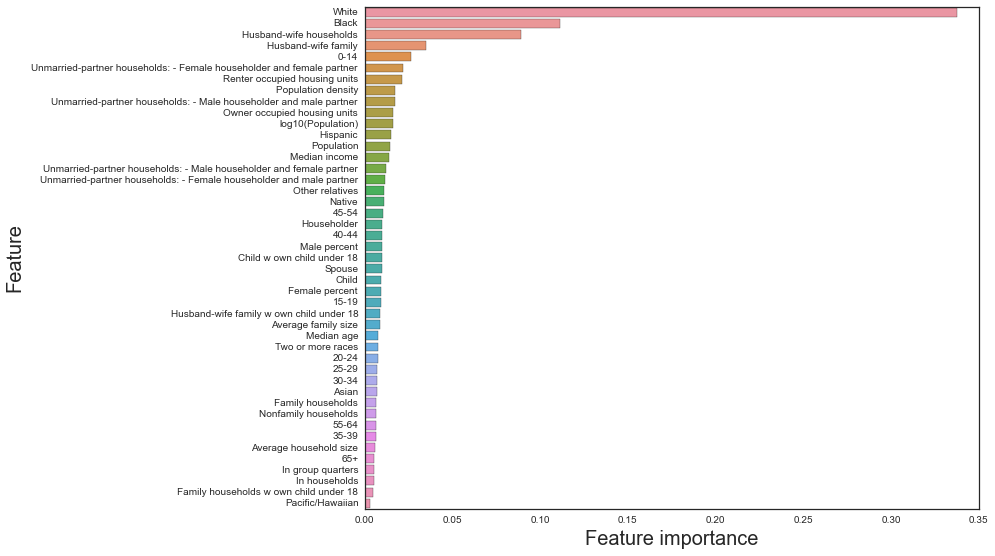

In [833]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

ax.set_xlabel("Feature importance", fontsize=20)
ax.set_ylabel("Feature", fontsize=20)

ax = sns.barplot(x=ranked_list, y=ranked_labels)
plt.savefig('../graphics/feature_importance_ranking_gonorrhea.png', bbox_inches='tight', dpi=150)

In [834]:
len(ranked_list)

45

Save model parameters for use in web app:

In [835]:
import pickle

In [836]:
with open("../data/randomforest_params_gonorrhea.pickle", "wb") as myfile:
    pickle.dump(clf, myfile)

In [837]:
with open("../data/Ymean_gonorrhea.pickle", "wb") as myfile:
    pickle.dump(Ymean, myfile)

In [838]:
with open("../data/Ystd_gonorrhea.pickle", "wb") as myfile:
    pickle.dump(Ystd, myfile)

In [839]:
deployed_model = pickle.load(open('../data/randomforest_params_gonorrhea.pickle', "rb" ))

In [840]:
print('Variance score: %.5f\t(%.5f)' % (deployed_model.score(X_test, Y_test), deployed_model.score(X_full, Y_full)))

Variance score: 0.63257	(0.67547)


## Suport Vector Regression

In [841]:
from sklearn.svm import SVR

In [842]:
svr_rbf = SVR(kernel='rbf', C=15, gamma=0.0001, epsilon=0.0005, tol=0.00001)
#svr_lin = SVR(kernel='linear', C=1, epsilon=0.001)
#svr_poly = SVR(kernel='poly', C=1, degree=2, epsilon=0.001)
svr_rbf.fit(X_train, Y_train)
#svr_lin.fit(X_train, Y_train)
#svr_poly.fit(X_train, Y_train)
#print('Variance score:\n\t%.5f\t(rbf)\n\t%.5f\t(lin)\n\t%.5f\t(poly)' % (svr_rbf.score(X_train, Y_train), svr_lin.score(X_train, Y_train),svr_poly.score(X_train, Y_train)))
print('Variance score:\n\t%.5f\t(rbf)' % (svr_rbf.score(X_test, Y_test)))

Variance score:
	0.54294	(rbf)


In [843]:
scores_svm = cross_validation.cross_val_score(svr_rbf, X_train, Y_train, cv=cv, n_jobs=1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

Accuracy: 0.56 (+/- 0.05)


## Model comparison

In [844]:
model_scores = []
model_errors = []
model_names = []
model_scores.append(np.mean(scores_regression))
model_errors.append(np.std(scores_regression)*2)
model_names.append("Linear")
model_scores.append(np.mean(scores_rregression))
model_errors.append(np.std(scores_rregression)*2)
model_names.append("Ridge")
model_scores.append(np.mean(scores_etregression))
model_errors.append(np.std(scores_etregression)*2)
model_names.append("Extra trees")
model_scores.append(np.mean(scores_adaregression))
model_errors.append(np.std(scores_adaregression)*2)
model_names.append("ADA boost")
model_scores.append(np.mean(scores_bagregression))
model_errors.append(np.std(scores_bagregression)*2)
model_names.append("Bagging")
model_scores.append(np.mean(scores_gradboostregression))
model_errors.append(np.std(scores_gradboostregression)*2)
model_names.append("Gradient boost")
model_scores.append(np.mean(scores_svm))
model_errors.append(np.std(scores_svm)*2)
model_names.append("Suport vector")
model_scores.append(np.mean(scores_randomforest))
model_errors.append(np.std(scores_randomforest)*2)
model_names.append("Random forest")

In [845]:
model_names, model_scores, model_errors

(['Linear',
  'Ridge',
  'Extra trees',
  'ADA boost',
  'Bagging',
  'Gradient boost',
  'Suport vector',
  'Random forest'],
 [0.5847105234843607,
  0.58786534860089268,
  0.6324785295904588,
  0.54676522894445267,
  0.64224007973060704,
  0.63398598006835605,
  0.56250136212146695,
  0.63840332545460832],
 [0.043641932269041284,
  0.040870694136661688,
  0.052936662416937376,
  0.06061554525825618,
  0.041139606814089714,
  0.044227383196599038,
  0.050902715488444085,
  0.050639350639095929])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


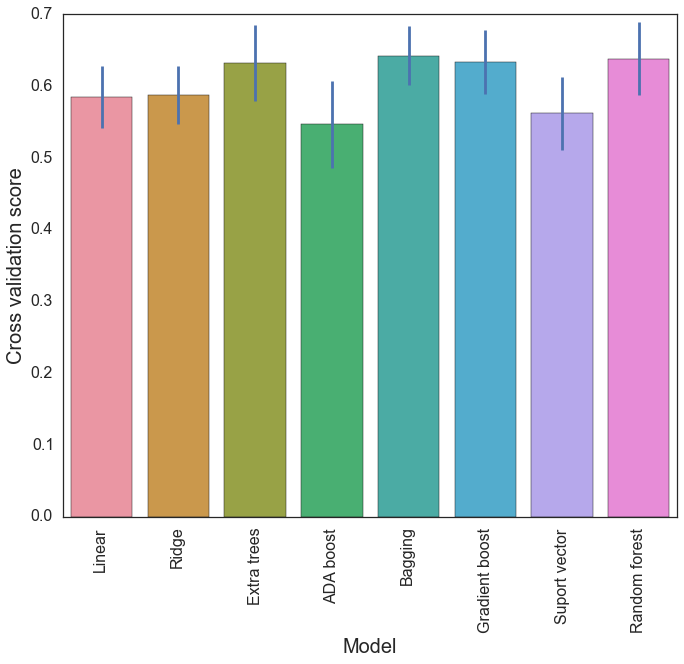

In [846]:
# Set up the matplotlib figure
sns.set_context("poster", font_scale=1)
f, ax = plt.subplots(figsize=(11, 9))

ax.set_xlabel("Model", fontsize=20)
ax.set_ylabel("Cross validation score", fontsize=20)

ax = sns.barplot(x=model_names, y=model_scores, yerr=model_errors)
plt.xticks(rotation=90)
plt.savefig('../graphics/model_performance_gonorrhea.png', bbox_inches='tight', dpi=150)